# 2D DDW

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

## Data Extraction and Cleaning

### Extract food supply data for 2018

This data is extracted from "DDW_Food Supply.csv".

In [4]:
df_food_supply = pd.read_csv("DDW_Food Supply.csv")
df_grand_total = df_food_supply[(df_food_supply["Item"] == "Grand Total")]
df2018_food_supply = df_grand_total[(df_grand_total["Year"] == 2018)]
df2018_food_supply = df2018_food_supply[["Year", "Area", "Value"]]
df2018_food_supply = df2018_food_supply.rename(columns = {"Area": "Country", "Value":"Food_supply"})
df2018_food_supply = df2018_food_supply.reset_index(drop=True)
df2018_food_supply

,Year,Country,Food_supply
0,2018,Afghanistan,2270
1,2018,Albania,3296
2,2018,Algeria,3382
3,2018,Angola,2451
4,2018,Antigua and Barbuda,2470
...,...,...,...
209,2018,Least Developed Countries,2424
210,2018,Land Locked Developing Countries,2549
211,2018,Small Island Developing States,2675
212,2018,Low Income Food Deficit Countries,2520


##### Finding the unique countries in food supply data

In [5]:
df_food_supply_countries = df2018_food_supply.Country.unique()

### Extract minimum calorie intake data for 2018

In [6]:
df_min_cal_intake = pd.read_csv("DDW_Min Cal Intake.csv")
df_min_cal_intake = df_min_cal_intake[df_min_cal_intake["Value"].notna()]
df2018_min_cal = df_min_cal_intake[(df_min_cal_intake["Year"] == 2018)]
df2018_min_cal = df2018_min_cal[["Year", "Area", "Value"]]
df2018_min_cal = df2018_min_cal.rename(columns = {"Area": "Country", "Value":"Mininum_calorie_intake"})
df2018_min_cal = df2018_min_cal.reset_index(drop=True)
df2018_min_cal

,Year,Country,Mininum_calorie_intake
0,2018,Afghanistan,1681.0
1,2018,Albania,1910.0
2,2018,Algeria,1778.0
3,2018,Angola,1662.0
4,2018,Antigua and Barbuda,1888.0
...,...,...,...
183,2018,Vanuatu,1696.0
184,2018,Venezuela (Bolivarian Republic of),1819.0
185,2018,Viet Nam,1784.0
186,2018,Yemen,1707.0


##### Finding the unique countries in minimum calorie intake data

In [7]:
df_min_cal_intake_countries = df2018_min_cal.Country.unique()

### Extract GDP per capita data for 2018

In [8]:
df_GDP = pd.read_csv("DDW_GDP per capita adjusted.csv")
df_GDP = df_GDP[(df_GDP["Value"].notna())]
df2018_GDP = df_GDP[(df_GDP["Year"])==2018]
df2018_GDP = df2018_GDP[["Year","Area","Value"]]
df2018_GDP = df2018_GDP.rename(columns = {"Area": "Country", "Value":"GDP_per_capita"})
df2018_GDP = df2018_GDP.reset_index(drop=True)
df2018_GDP

,Year,Country,GDP_per_capita
0,2018,Afghanistan,2033.8
1,2018,Albania,13317.1
2,2018,Algeria,11630.7
3,2018,Angola,6982.1
4,2018,Antigua and Barbuda,21017.3
...,...,...,...
182,2018,Uzbekistan,7082.9
183,2018,Vanuatu,3093.1
184,2018,Viet Nam,9548.7
185,2018,Zambia,3521.5


#### List of unique countries for GDP per capita data

In [9]:
df_GDP_countries = df2018_GDP.Country.unique()

### Extract population data for 2018

In [10]:
df_pop = pd.read_csv("DDW_Population.csv")
# df_pop = df_pop.dropna()
df2018_population = df_pop[(df_pop["year"]==2018)]
df2018_population = df2018_population[df2018_population["population"].notna()]
df2018_population = df2018_population[["year", "country", "population"]]
df2018_population = df2018_population.rename(columns = {"year": "Year", "country": "Country", "population":"Population"})
df2018_population = df2018_population.reset_index(drop=True)
df2018_population

,Year,Country,Population
0,2018,Afghanistan,3.717192e+07
1,2018,Africa,1.275921e+09
2,2018,Albania,2.882735e+06
3,2018,Algeria,4.222842e+07
4,2018,Andorra,7.700800e+04
...,...,...,...
226,2018,Wallis and Futuna,1.165300e+04
227,2018,World,7.631081e+09
228,2018,Yemen,2.849868e+07
229,2018,Zambia,1.735171e+07


#### Getting unique countries for population data

In [11]:
df_pop_coutries = df2018_population.Country.unique()

### Extract land area used for agriculture data for 2018

In [12]:
df_agriculture = pd.read_csv("DDW_Agricultural Land.csv")
# remove rows with no value (NaN)
df2018_agriculture = df_agriculture[["Country Name","2018"]]
df2018_agriculture = df2018_agriculture[df2018_agriculture["2018"].notna()]
df2018_agriculture = df2018_agriculture.rename(columns = {"Country Name": "Country", "2018":"Agriculture_land_area"})
df2018_agriculture = df2018_agriculture.reset_index(drop=True)
df2018_agriculture


,Country,Agriculture_land_area
0,Aruba,20.00
1,Africa Eastern and Southern,6556857.12
2,Afghanistan,380100.00
3,Africa Western and Central,3591824.60
4,Angola,569524.90
...,...,...
252,Samoa,551.70
253,"Yemen, Rep.",234520.00
254,South Africa,963410.00
255,Zambia,238360.00


#### Getting unique countries for Agriculture data

In [13]:
df_agriculture_countries = df2018_agriculture.Country.unique()

### Extract CO2 (in million metric tonnes) data for 2018

In [14]:
df_co2 = pd.read_csv("DDW_CO2.csv")
df2018_co2 = df_co2[(df_co2["year"])==2018]
df2018_co2 = df2018_co2[df2018_co2["co2"].notna()]
df2018_co2 = df2018_co2[["year","country","co2"]]
df2018_co2 = df2018_co2.rename(columns = {"year": "Year", "country": "Country"})
df2018_co2 = df2018_co2.reset_index(drop=True)
df2018_co2

,Year,Country,co2
0,2018,Afghanistan,8.345
1,2018,Africa,1385.645
2,2018,Albania,4.734
3,2018,Algeria,161.487
4,2018,Andorra,0.495
...,...,...,...
232,2018,Wallis and Futuna,0.026
233,2018,World,36646.141
234,2018,Yemen,9.984
235,2018,Zambia,7.313


#### Getting unique countries for $CO_{2}$ data

In [15]:
df_co2_countries = df2018_co2.Country.unique()

### Extract basic water drinking services data for 2018

In [16]:
df_water = pd.read_csv("DDW_Basic Water Drinking Services.csv")
df_water = df_water[df_water["Value"].notna()]
df2018_water = df_water[(df_water["Year"] == 2018)]
df2018_water = df2018_water[["Year", "Area", "Value"]]
df2018_water["Value"] = df2018_water["Value"]/100
df2018_water = df2018_water.rename(columns = {"Area": "Country", "Value": "Percentage_with_basic_water_service"})
df2018_water = df2018_water.reset_index(drop=True)
df2018_water


,Year,Country,Percentage_with_basic_water_service
0,2018,Afghanistan,0.696
1,2018,Albania,0.944
2,2018,Algeria,0.940
3,2018,American Samoa,0.990
4,2018,Andorra,0.990
...,...,...,...
227,2018,Small Island Developing States,0.831
228,2018,Low income economies,0.574
229,2018,Lower-middle-income economies,0.870
230,2018,High-income economies,0.990


#### Getting unique countries for basic water drinking services data

In [17]:
df_water_countries = df2018_water.Country.unique()

### Extract Eating Disorder data for 2018

In [18]:
df_eating_disorder = pd.read_csv("DDW_Eating Disorder.csv")
df_eating_disorder = df_eating_disorder[df_eating_disorder["Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)"].notna()]
df_eating_disorder = df_eating_disorder.rename(columns = {"Entity": "Country", "Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)":"Prevalence"})
df2018_eating_disorder = df_eating_disorder[(df_eating_disorder["Year"] == 2018)]
df2018_eating_disorder = df2018_eating_disorder[["Year", "Country", "Prevalence"]]
df2018_eating_disorder = df2018_eating_disorder.rename(columns = {"Prevalence": "Prevalence_of_eating_disorder"})
df2018_eating_disorder = df2018_eating_disorder.reset_index(drop=True)
df2018_eating_disorder

,Year,Country,Prevalence_of_eating_disorder
0,2018,Afghanistan,0.12
1,2018,African Region (WHO),0.11
2,2018,Albania,0.14
3,2018,Algeria,0.22
4,2018,American Samoa,0.13
...,...,...,...
223,2018,World Bank Lower Middle Income,0.13
224,2018,World Bank Upper Middle Income,0.17
225,2018,Yemen,0.13
226,2018,Zambia,0.12


#### Getting unique countries for eating disorder data

In [19]:
df_eating_disorder_countries = df2018_eating_disorder.Country.unique()

### Extract number of people employed in agriculture data for 2018

In [20]:
df_employment = pd.read_csv("DDW_Employment In Agriculture.csv")
df_employment = df_employment[df_employment["Value"].notna()]
df2018_employement = df_employment[(df_employment["Year"] == 2018)]
df2018_employement = df2018_employement[["Year", "Area", "Value"]]
df2018_employement = df2018_employement.rename(columns = {"Area": "Country", "Value":"Number_employed_in_agriculture"})
df2018_employement = df2018_employement.reset_index(drop=True)
df2018_employement

,Year,Country,Number_employed_in_agriculture
0,2018,Albania,458.226
1,2018,Argentina,11.153
2,2018,Armenia,270.298
3,2018,Australia,329.660
4,2018,Austria,159.549
...,...,...,...
101,2018,United States of America,2132.997
102,2018,Uruguay,136.725
103,2018,Uzbekistan,3537.200
104,2018,Viet Nam,20465.122


#### Getting unique countries for population employed

In [21]:
df_employment_countries = df2018_employement.Country.unique()

### Create list of common countries

In [22]:
countries = []
for i in df_food_supply_countries:
    if i in df_min_cal_intake_countries and i in df_GDP_countries and i in df_pop_coutries and i in df_agriculture_countries and i in df_co2_countries and i in df_water_countries and i in df_eating_disorder_countries and i in df_employment_countries:
        countries.append(i)
print(countries)
print(len(countries))

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Canada', 'Chad', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Myanmar', 'Namibia', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Rwanda', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Thailand', 'United Arab Emirates', 'Uruguay', 'Uzbekistan']
81


### With the list of common countries, we are now able to continue combining our dataframes ...

### Calculate food supply to mininum calorie intake ratio 
done by finding (food supply)/(mininum calorie intake)

In [23]:
df2018_food_supply = df2018_food_supply[df2018_food_supply["Country"].isin(countries)]
df2018_min_cal = df2018_min_cal[df2018_min_cal["Country"].isin(countries)]

df2018_y_value = df2018_food_supply.copy()
df2018_y_value["Mininum_calorie_intake"] = list(df2018_min_cal["Mininum_calorie_intake"])
df2018_y_value["y_ratio"] = df2018_y_value["Food_supply"]/df2018_y_value["Mininum_calorie_intake"]
df2018_y_value = df2018_y_value.reset_index(drop=True)
df2018_y_value

,Year,Country,Food_supply,Mininum_calorie_intake,y_ratio
0,2018,Albania,3296,1910.0,1.725654
1,2018,Armenia,3074,1873.0,1.641217
2,2018,Australia,3394,1909.0,1.777894
3,2018,Austria,3699,1943.0,1.903757
4,2018,Azerbaijan,3145,1863.0,1.688137
...,...,...,...,...,...
76,2018,Switzerland,3378,1960.0,1.723469
77,2018,Thailand,2787,1884.0,1.479299
78,2018,United Arab Emirates,3048,2043.0,1.491924
79,2018,Uruguay,3198,1861.0,1.718431


### Calculate Agriculture Land per capita

In [24]:
df2018_agriculture = df2018_agriculture[df2018_agriculture["Country"].isin(countries)]
df2018_population = df2018_population[df2018_population["Country"].isin(countries)]

df2018_agriculture_per_pop = df2018_agriculture.copy()
df2018_agriculture_per_pop["Total_Population"] = list(df2018_population["Population"])
df2018_agriculture_per_pop["Agricultural_Land_Per_Capita"] = df2018_agriculture_per_pop["Agriculture_land_area"]/df2018_agriculture_per_pop["Total_Population"]
df2018_agriculture_per_pop = df2018_agriculture_per_pop.reset_index(drop=True)
df2018_agriculture_per_pop

,Country,Agriculture_land_area,Total_Population,Agricultural_Land_Per_Capita
0,Albania,11740.81,2882735.0,0.004073
1,United Arab Emirates,3817.50,2951741.0,0.001293
2,Armenia,16773.00,24898152.0,0.000674
3,Australia,3588950.00,8891383.0,0.403644
4,Austria,26528.30,9949537.0,0.002666
...,...,...,...,...
76,Chad,502380.00,8525614.0,0.058926
77,Thailand,228100.00,69428456.0,0.003285
78,Uruguay,141908.00,9630966.0,0.014735
79,Uzbekistan,255203.00,3449290.0,0.073987


### Calculate percentage of population employed in the agriculture industry

In [25]:
df2018_employement = df2018_employement[df2018_employement["Country"].isin(countries)]
df2018_population = df2018_population[df2018_population["Country"].isin(countries)]

df2018_percentage_employed = df2018_employement.copy()
df2018_percentage_employed["Total_Population"] = list(df2018_population["Population"])
df2018_percentage_employed["Percentage_Employed_In_Agriculture"] = (df2018_percentage_employed["Number_employed_in_agriculture"]/df2018_percentage_employed["Total_Population"])*100
df2018_percentage_employed = df2018_percentage_employed.reset_index(drop=True)
df2018_percentage_employed

,Year,Country,Number_employed_in_agriculture,Total_Population,Percentage_Employed_In_Agriculture
0,2018,Albania,458.226,2882735.0,0.015896
1,2018,Armenia,270.298,2951741.0,0.009157
2,2018,Australia,329.660,24898152.0,0.001324
3,2018,Austria,159.549,8891383.0,0.001794
4,2018,Azerbaijan,1769.300,9949537.0,0.017783
...,...,...,...,...,...
76,2018,Switzerland,138.531,8525614.0,0.001625
77,2018,Thailand,12168.287,69428456.0,0.017526
78,2018,United Arab Emirates,105.703,9630966.0,0.001098
79,2018,Uruguay,136.725,3449290.0,0.003964


### Calculate co2 per agricultural land

In [26]:
df2018_co2 = df2018_co2[df2018_co2["Country"].isin(countries)]
df2018_agriculture = df2018_agriculture[df2018_agriculture["Country"].isin(countries)]


df2018_co2_per_land = df2018_co2.copy()
df2018_co2_per_land["Agricultural_land"] = list(df2018_agriculture["Agriculture_land_area"])
df2018_co2_per_land["co2_per_agricultural_land_area"] = df2018_co2_per_land["co2"]/df2018_co2_per_land["Agricultural_land"]
df2018_co2_per_land = df2018_co2_per_land.reset_index(drop=True)
df2018_co2_per_land


,Year,Country,co2,Agricultural_land,co2_per_agricultural_land_area
0,2018,Albania,4.734,11740.81,0.000403
1,2018,Armenia,5.826,3817.50,0.001526
2,2018,Australia,416.001,16773.00,0.024802
3,2018,Austria,66.565,3588950.00,0.000019
4,2018,Azerbaijan,36.847,26528.30,0.001389
...,...,...,...,...,...
76,2018,Switzerland,36.868,502380.00,0.000073
77,2018,Thailand,276.177,228100.00,0.001211
78,2018,United Arab Emirates,154.204,141908.00,0.001087
79,2018,Uruguay,6.571,255203.00,0.000026


### Filtering the rest of the dataframes needed based on the list of common countries

In [27]:
df2018_GDP = df2018_GDP[df2018_GDP["Country"].isin(countries)]
df2018_GDP = df2018_GDP.reset_index(drop=True)
df2018_water = df2018_water[df2018_water["Country"].isin(countries)]
df2018_water = df2018_water.reset_index(drop=True)
df2018_eating_disorder = df2018_eating_disorder[df2018_eating_disorder["Country"].isin(countries)]
df2018_eating_disorder = df2018_eating_disorder.reset_index(drop=True)


### Combining all the variables into 1 data frame, filtering the data based on the countries available in countries list

In [28]:
df2018_combined = df2018_y_value.loc[:, ["Country", "y_ratio"]]
df2018_combined["GDP_per_capita"] = df2018_GDP.loc[:, "GDP_per_capita"]
df2018_combined["Agricultural_land_per_capita"] = df2018_agriculture_per_pop.loc[:, "Agricultural_Land_Per_Capita"]
df2018_combined["Percentage_with_basic_water_service"] = df2018_water.loc[:, "Percentage_with_basic_water_service"]
df2018_combined["Prevalence_of_eating_disorder"] = df2018_eating_disorder.loc[:, "Prevalence_of_eating_disorder"]
df2018_combined["Percentage_employed_in_agriculture"] = df2018_percentage_employed.loc[:, "Percentage_Employed_In_Agriculture"]
df2018_combined["co2_per_agricultural_land_area"] = df2018_co2_per_land.loc[:, "co2_per_agricultural_land_area"]
df2018_combined = df2018_combined.reset_index(drop=True)
df2018_combined

,Country,y_ratio,GDP_per_capita,Agricultural_land_per_capita,Percentage_with_basic_water_service,Prevalence_of_eating_disorder,Percentage_employed_in_agriculture,co2_per_agricultural_land_area
0,Albania,1.725654,13317.1,0.004073,0.944,0.14,0.015896,0.000403
1,Armenia,1.641217,12715.1,0.001293,0.990,0.13,0.009157,0.001526
2,Australia,1.777894,49029.1,0.000674,0.990,1.12,0.001324,0.024802
3,Austria,1.903757,55258.4,0.403644,0.990,0.61,0.001794,0.000019
4,Azerbaijan,1.688137,14209.6,0.002666,0.947,0.15,0.017783,0.001389
...,...,...,...,...,...,...,...,...
76,Switzerland,1.723469,70597.3,0.058926,0.990,0.54,0.001625,0.000073
77,Thailand,1.479299,18101.5,0.003285,0.990,0.14,0.017526,0.001211
78,United Arab Emirates,1.491924,66968.2,0.014735,0.990,0.31,0.001098,0.001087
79,Uruguay,1.718431,23035.1,0.073987,0.990,0.38,0.003964,0.000026


In [29]:
df2018_combined.to_csv("df2018_combined_v1.csv")

### Pair plots

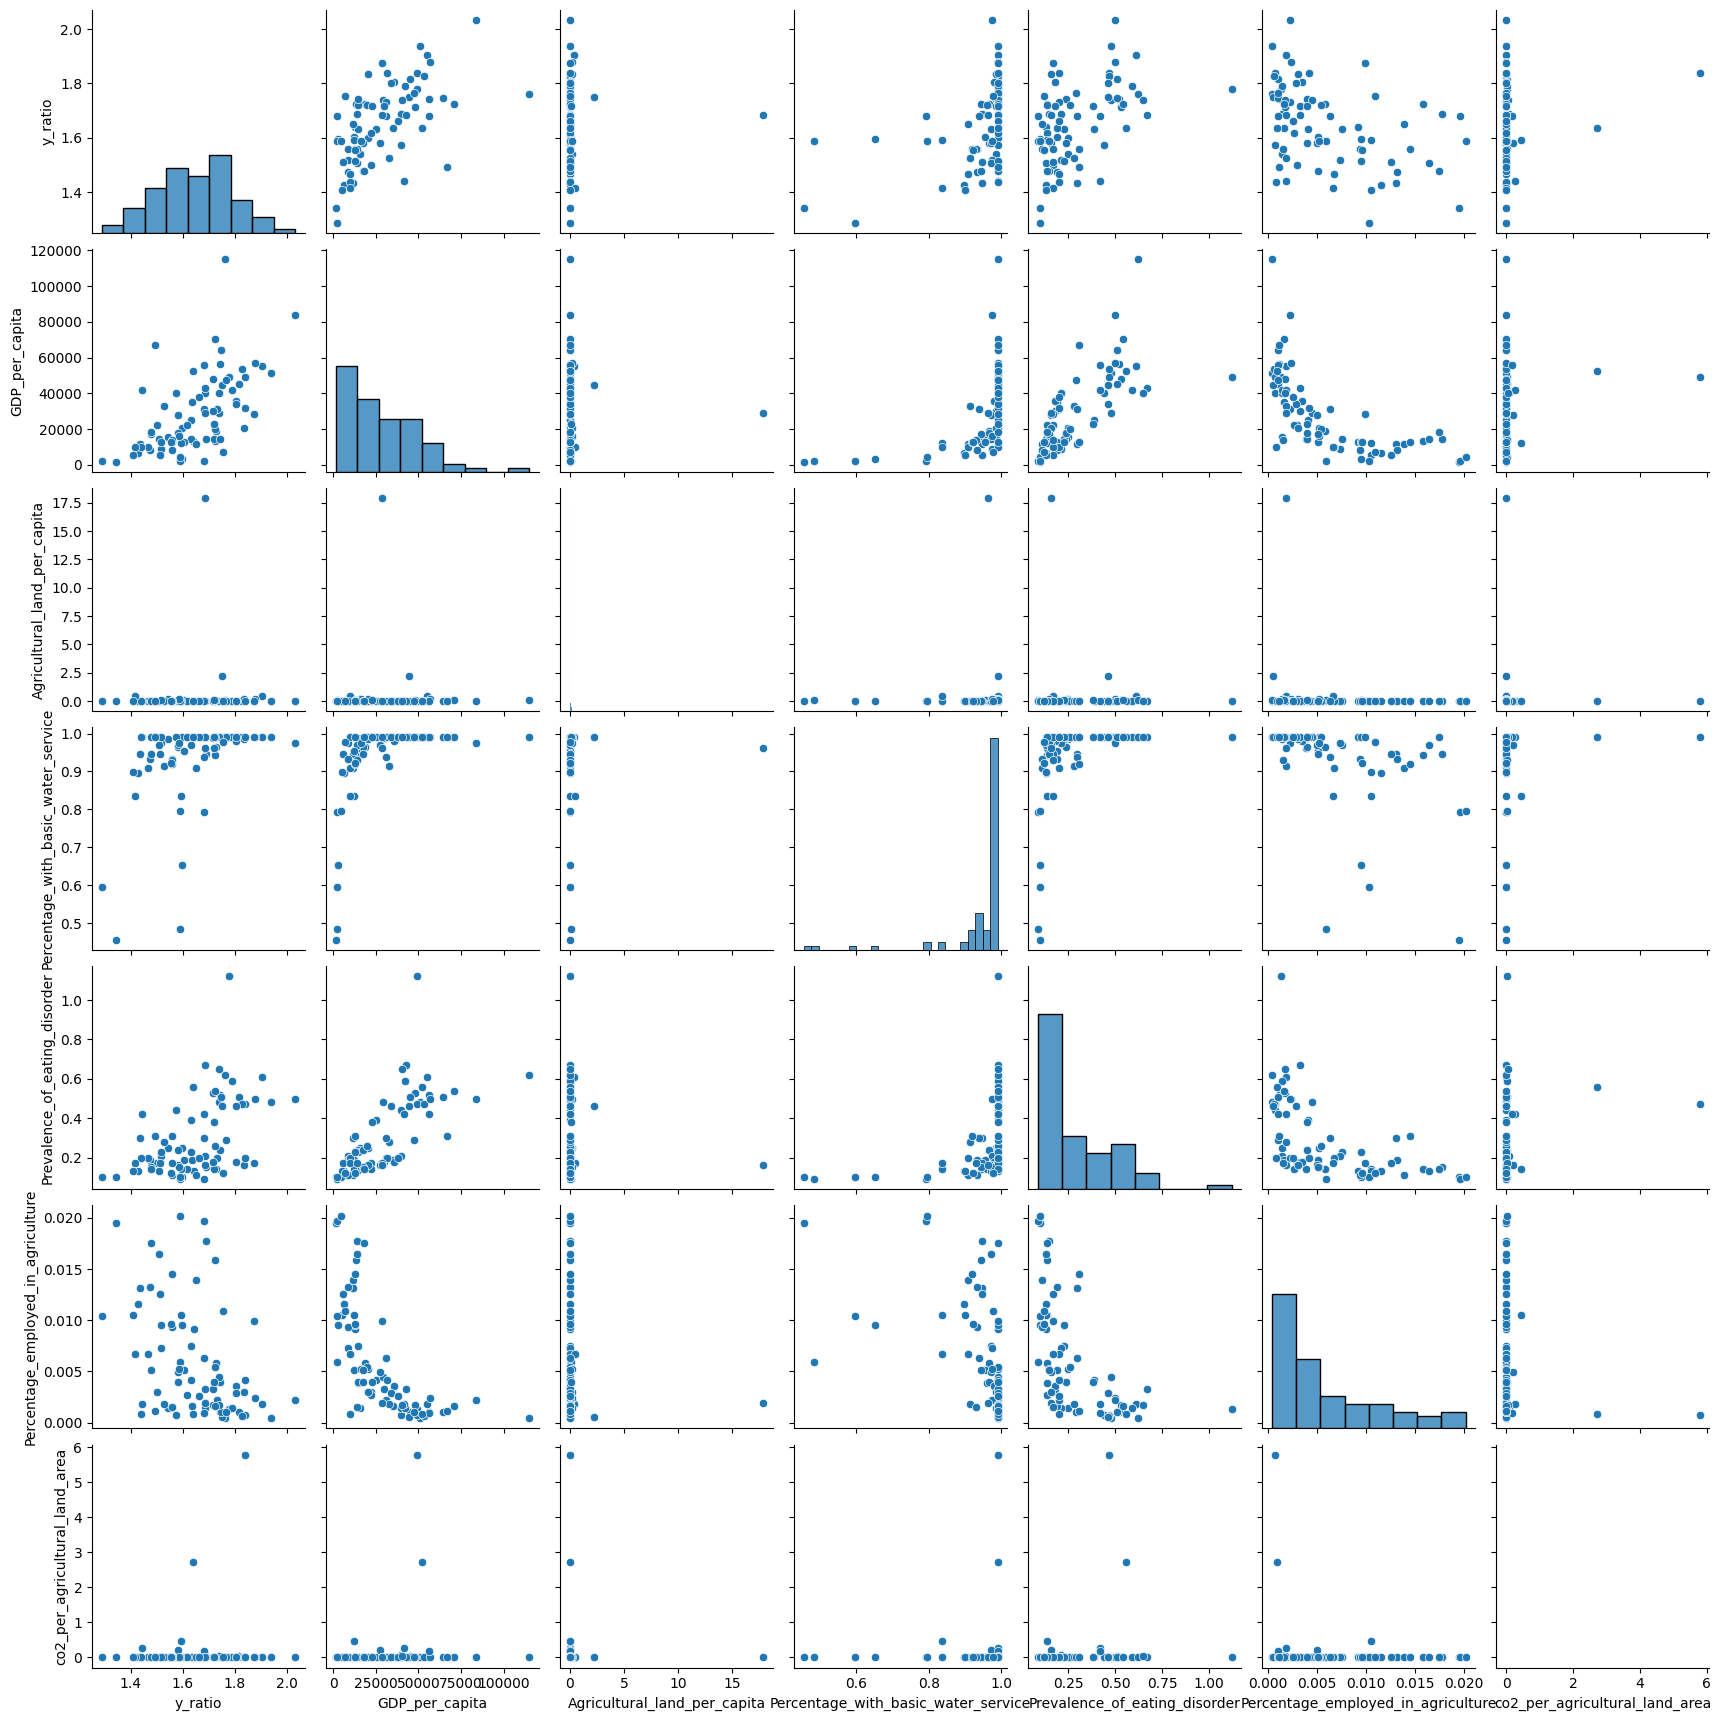

In [30]:
myplot = sns.pairplot(data=df2018_combined)

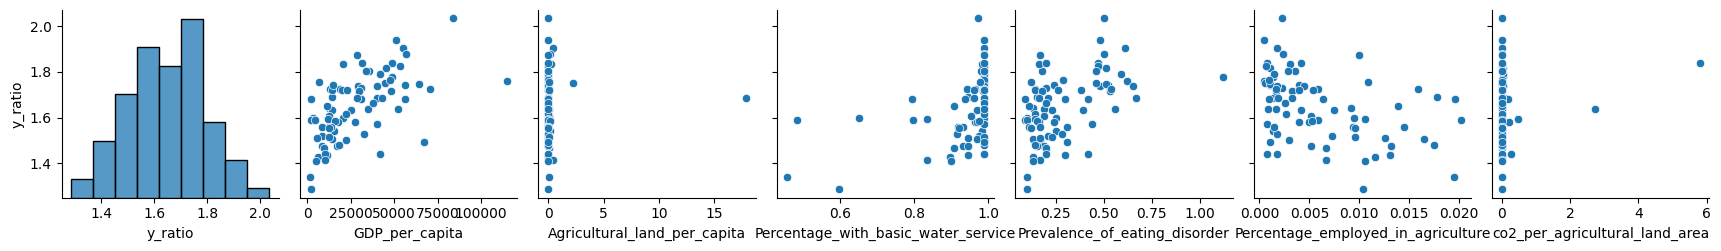

In [31]:
myplot = sns.pairplot(y_vars = "y_ratio", data=df2018_combined)

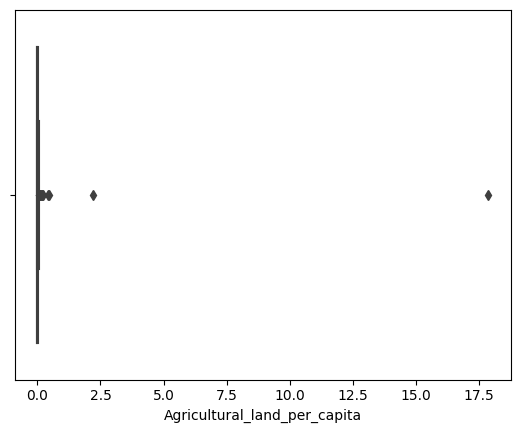

In [33]:
myplot = sns.boxplot(x = 'Agricultural_land_per_capita', data = df2018_combined)

In [ ]:
df[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

df[~(np.abs(df.Data-df.Data.mean()) > (3*df.Data.std()))]
# or if you prefer the other way around

In [35]:
df2018_combined[["Agricultural_land_per_capita"]]

,Agricultural_land_per_capita
0,0.004073
1,0.001293
2,0.000674
3,0.403644
4,0.002666
...,...
76,0.058926
77,0.003285
78,0.014735
79,0.073987


### Standardisation and Normalisaiton of data

In [42]:
def normalize_z(dfin):
    dfout = (dfin - dfin.mean(axis=0))/dfin.std(axis=0)
    return dfout

def normalize_min_max(dfin):
    dfout = (dfin - dfin.min(axis=0))/(dfin.max(axis=0) - dfin.min(axis=0))
    return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:,feature_names]
    df_target = df.loc[:,target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    feature = df_feature.to_numpy().reshape(-1, len(df_feature.columns))
    X = np.concatenate((np.ones((feature.shape[0],1)),feature), axis = 1)
    return X

def prepare_target(df_target):
    target = df_target.to_numpy().reshape(-1, len(df_target.columns))
    return target

def predict(df_feature, beta):
    feature_norm = normalize_z(df_feature)
    X = prepare_feature(feature_norm)
    return np.matmul(X, beta)

def calc_linear(X, beta):
    return np.matmul(X, beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    
    k = int(test_size*len(indexes))
    test_index = np.random.choice(indexes, k, replace = False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    
    df_feature_train = df_feature.loc[train_index,:]
    df_feature_test = df_feature.loc[test_index,:]
    
    df_target_train = df_target.loc[train_index,:]
    df_target_test = df_target.loc[test_index,:]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def r2_score(y, ypred):
    ymean = np.mean(y)
    diff = y-ymean
    sstot = np.matmul(diff.T, diff)
    error = y -ypred
    ssres = np.matmul(error.T,error)
    return 1 - ssres/sstot

def mean_squared_error(target, pred):
    n = target.shape[0]
    error = target - pred
    return (1/n)*np.matmul(error.T, error)[0][0]

In [ ]:
df2018_combined["y_ratio"] = normalize_z(df2018_combined["y_ratio"])
df2018_combined["GDP_per_capita_normalised"] = normalize_z(df2018_combined["GDP_per_capita_normalised"])
df2018_combined["Agricultural_land_per_capita_normalised"] = normalize_z(df2018_combined["Agricultural_land_per_capita_normalised"])
df2018_combined["Percentage_with_basic_water_service_normalised"] = normalize_z(df2018_combined["Percentage_with_basic_water_service_normalised"])
df2018_combined["Prevalence_of_eating_disorder_normalised"] = df2018_eating_disorder.loc[:, "Prevalence_of_eating_disorder"]
df2018_combined["Percentage_employed_in_agriculture_normalised"] = df2018_percentage_employed.loc[:, "Percentage_Employed_In_Agriculture"]
df2018_combined["co2_per_agricultural_land_area_normalised"] = df2018_co2_per_land.loc[:, "co2_per_agricultural_land_area"]
df2018_combined

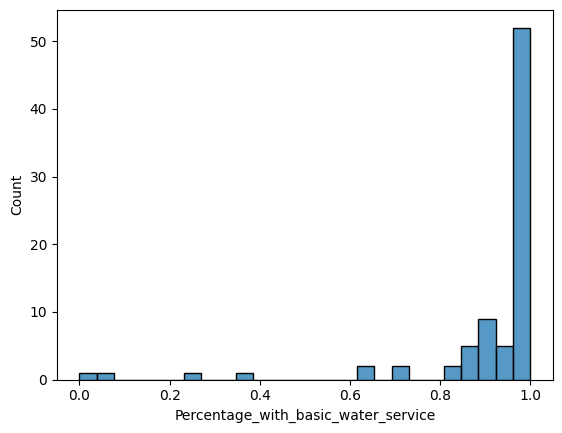

In [45]:
new_agricultural_land = normalize_min_max((df2018_combined[["Percentage_with_basic_water_service"]]))
new_agricultural_land
myploy = sns.histplot(x='Percentage_with_basic_water_service', data=new_agricultural_land)

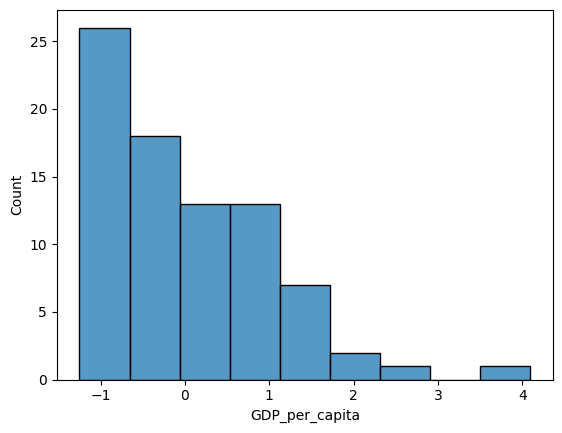

In [46]:
new_gdp = normalize_z((df2018_combined[["GDP_per_capita"]]))
new_gdp
myploy = sns.histplot(x='GDP_per_capita', data=new_gdp)